Tarea1
Guillermo Fierro Herrera
EL42003

Parte1:
1. Preguntas teóricas
• ¿Qué es un paradigma de programación?
    R:


• ¿En qué se basa la programación orientada a objetos?
    R: 


• ¿Cuál es la diferencia entre recursividad e iteración, y cómo se relaciona esto con la notación
big 𝑂?
    R: Recursividad llama a la misma fucnión para realizar calulos previos que se operan con una regla recursiva, teniendo un caso base en el cual termina la recursividad. Por otro lado la iteración corresponde a operar segun una formula o regla, entro de la misma función. La notación O 


• explicar la diferencia de rendimiento entre 𝑂(1) y 𝑂(𝑛)
    R: 𝑂(1) representa un tiemppo constante, el cual tomara el mismo tiempo de ejecución (de forma ideal, sin considerar perturbacones en el PC por ejemplo), misntras que 𝑂(𝑛) depende de forma lineal con el valor de 𝑛, que puede ser un tamaño de lista, iteraciones u etc.


• ¿Cómo se calcula el orden en un programa que funciona por etapas?
    R: Se puede ir calculando el tiempo de ejecución de las etapas. revisando si existe dependencia entre estas mismas, por ejemplo; un for dentro de otro for en una iteración se podria tomar como una multiplicación de tiempos (en algunos casos). 

    
• ¿Cómo se puede determinar la complejidad temporal de un algoritmo recursivo?
    R: Cuando los problemas son de una estructura más compleja, como por ejemplo funciónes o algoritmos de recurrencia; se utiliza el Teorema Maestro que es una solución a estos. Sin embargo tambien se pueden representar como ecuaciónes de diferencia y resolver con tecnicas conocidas de Ecuaciones de Diferencia.

Parte2:

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter

# Decorador para medir y almacenar el tiempo de ejecución

def almacenar_tiempo(func):
    def funcionDecorada(*args, **kwargs):
        tiempo_inicio = perf_counter()
        
        # Ejecutar la función original con los argumentos que recibió
        resultadoFun = func(*args, **kwargs)
        
        tiempo_fin = perf_counter()
        tiempo_ejecucion = tiempo_fin - tiempo_inicio
        
        # Retornar tiempo de ejecución junto con el resultado de la función
        TiempoYFuncion = [tiempo_ejecucion, resultadoFun]
        return TiempoYFuncion
    return funcionDecorada


class PCB:
    """Constructor"""
    def __init__(self,N,M):
        self.columnas = int(N)
        self.filas = int(M)
        self.posibles_caminos = np.zeros((self.columnas,self.filas))
        self.tiempos_ejecucion = []
    """
    Metodo1: Toma las columnas y filas y agrega un valor
    de acuerdo a cuantos caminos pueden pasar por esa celda,
    si es que se intenta acercar al punto B, desde A.
    """
    def metodo_iteracion(self):
        placa = self.posibles_caminos
        for i in range(self.columnas):
            for j in range(self.filas):
                #caso base
                if (i == 0) or (j == 0):
                    placa[i,j] = 1
                #iteraciones
                else:
                    placa[i,j] = int(placa[i,j-1] + placa[i-1,j])
        return int(placa[self.columnas-1,self.filas-1])
    """
    Metodo2: Realiza una suma hacia atras, de todos
    los posibles caminos que puede tomar
    ya que la ultima celda solo recibe caminos de 
    forma horizontal y vertical, luego se van acumulando.
    (difiní una funcion, ya que de esa forma el metodo no 
    depende de ningun parametro más que la PCB).
    """
    def metodo_recursivo(self):
        a = self.columnas
        b = self.filas
        k = 0
        def fun_recursiva(n,m):
            #caso base
            if (n == 1) or (m ==1):
                return 1
            #iteraciones
            else:
                resultado = fun_recursiva(n-1,m) + fun_recursiva(n,m-1)
                return resultado
        return fun_recursiva(a,b)
    """
    Soluciones llamadas por un metodo
    """ 
class Solucion:
    def __init__(self,pcb):
        self.pcb = pcb
    
    @almacenar_tiempo
    def cualSol(self,cual):
        if cual == 0:
            #print("solución iterativa:")
            #print(self.Ite)
            return self.pcb.metodo_iteracion()
        if cual ==1:
            #print("solución recursiva:")
            #print(self.Rec)
            return self.pcb.metodo_recursivo()


Ejemplo de funcionamiento:

In [35]:
PCB_ejemplo = PCB(10,5)


In [36]:
a= Solucion(PCB_ejemplo).cualSol(0)
b = Solucion(PCB_ejemplo).cualSol(1)
print(a)
print(b)

[6.884699905640446e-05, 715]
[0.00020656100241467357, 715]


graficos parte 2

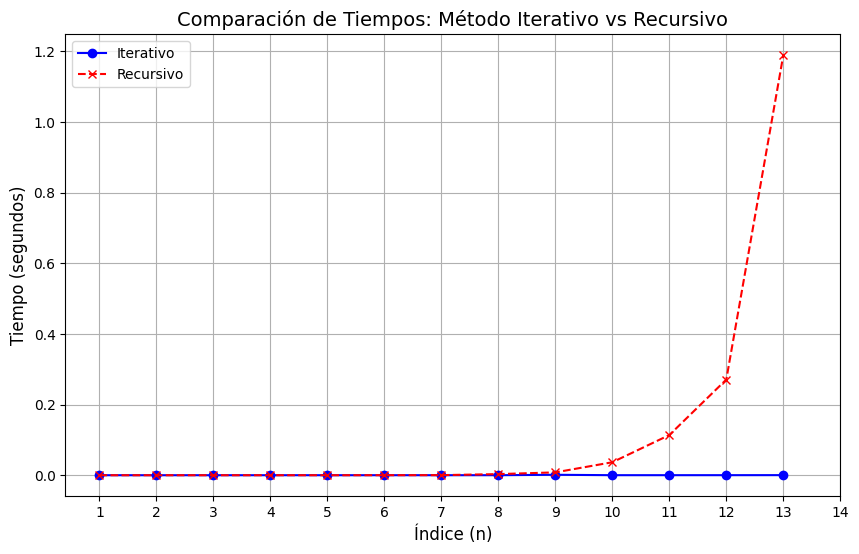

In [41]:
t_ite = []
t_rec = []
caminos_rec = []

# Generando datos de tiempo para métodos iterativo y recursivo
for i in range(1, 14):
    P = PCB(i,i)
    t_ite.append(Solucion(P).cualSol(0)[0])
    t_rec.append(Solucion(P).cualSol(1)[0])


plt.figure(figsize=(10,6))



plt.plot(t_ite, label=r"Iterativo", color='b', linestyle='-', marker='o')
plt.plot(t_rec, label=r"Recursivo", color='r', linestyle='--', marker='x')
plt.title("Comparación de Tiempos: Método Iterativo vs Recursivo", fontsize=14)
plt.xlabel("Índice (n)", fontsize=12)
plt.ylabel("Tiempo (segundos)", fontsize=12)
plt.grid(True)
plt.legend(loc="best")
plt.xticks(range(14), range(1, 15)) 

plt.show()

en este primer grafico se puede observar que la versión recursiva es exponenial, mientras que la iterativa es lineal, sin embargo para verificar esto ultimo se muestra el siguiente grafico.

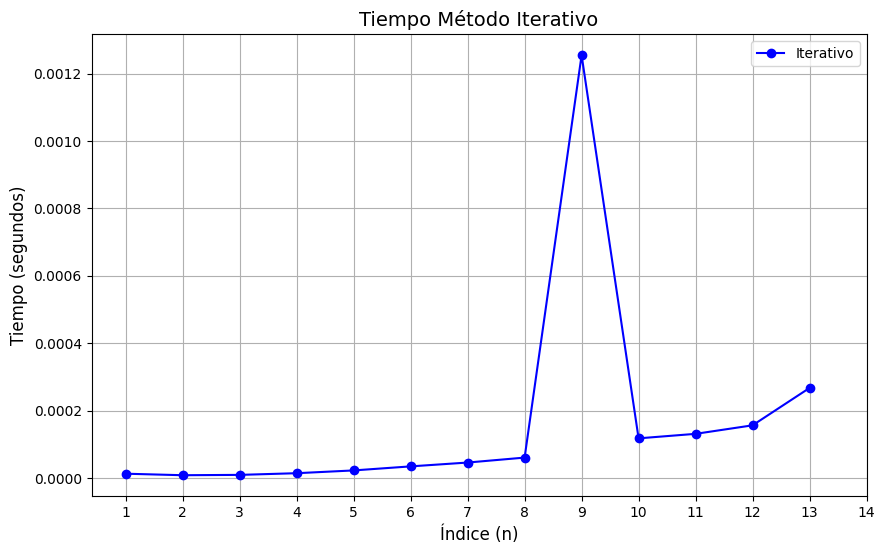

In [42]:
plt.figure(figsize=(10,6))
plt.plot(t_ite, label=r"Iterativo", color='b', linestyle='-', marker='o')
plt.title("Tiempo Método Iterativo", fontsize=14)
plt.xlabel("Índice (n)", fontsize=12)
plt.ylabel("Tiempo (segundos)", fontsize=12)
plt.grid(True)
plt.legend(loc="best")
plt.xticks(range(14), range(1, 15)) 

plt.show()
